In [65]:
import numpy as np
import pandas as pd
import os

In [66]:
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [67]:
df= pd.read_csv('/content/Sample-Superstore.csv')

In [68]:
df.shape

(9994, 21)

In [69]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [70]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [71]:
df['Postal Code']=df['Postal Code'].astype(object)

In [72]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [73]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [74]:
df = df.rename(columns= lambda x:x.replace(" ","_").lower())
df= df.rename(columns = {'sub-category': 'sub_category'})
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [75]:
df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

In [76]:
df.duplicated().sum()

0

In [77]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [78]:
df.describe()

,row_id,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896
std,2885.163629,623.245101,2.225110,0.206452,234.260108
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000


In [79]:
px.scatter(df,x='profit',y='discount')

In [80]:
df.groupby('discount').customer_id.count()

discount
0.00    4798
0.10      94
0.15      52
0.20    3657
0.30     227
0.32      27
0.40     206
0.45      11
0.50      66
0.60     138
0.70     418
0.80     300
Name: customer_id, dtype: int64

In [81]:
px.bar(df.groupby('discount').row_id.count())

In [82]:
px.bar(df.query('discount != 0.00'), x = 'category' ,y= 'profit')

In [83]:
px.bar(df.query('discount !=0.00').groupby('category').profit.sum())

In [84]:
px.bar(df.query(" discount != 0.00 and category == 'Furniture'").groupby(["sub_category"]).row_id.count())

In [85]:
px.bar(df.query(" discount != 0.00 and category == 'Furniture'").groupby(["sub_category"]).profit.sum())

In [86]:
px.scatter(df.query(" discount != 0.00 and category == 'Furniture'"), x = "order_date", y = "sales", color = "sub_category" ,color_discrete_sequence=px.colors.qualitative.Vivid)

In [87]:
px.bar(df.query(" discount != 0.00 and category == 'Furniture'").groupby(["region"]).profit.sum()) 

In [88]:
all_states = df.query(" discount != 0.00 and category == 'Furniture'").groupby(["state"]).profit.sum() 
all_states.shape[0]

25

In [89]:
(all_states>0).sum()

6

In [90]:
df.query(" discount != 0.00 and category == 'Furniture'").groupby(["segment"]).profit.sum() 

segment
Consumer      -21804.9336
Corporate     -11623.7845
Home Office    -6253.0855
Name: profit, dtype: float64

In [91]:
px.histogram(df.query(" discount != 0.00 and category == 'Furniture'"), x = "segment",y = "profit", color = "sub_category" , barmode = "group") 

In [92]:
px.bar(df.query(" discount != 0.00 and category == 'Technology'").groupby(["sub_category"]).customer_id.count())

In [93]:
px.bar(df.query(" discount != 0.00 and category == 'Technology'").groupby(["sub_category"]).profit.sum())


In [94]:
px.scatter(df.query(" discount != 0.00 and category == 'Technology'"), x = "order_date", y = "sales", color = "sub_category",color_discrete_sequence=px.colors.qualitative.Vivid)

In [95]:
px.histogram(df.query(" discount != 0.00 and category == 'Technology'"), x = "segment",y = "profit", color = "sub_category" , barmode = "group")

In [96]:
px.bar(df.query(" discount != 0.00 and category == 'Technology'").groupby(["region"]).profit.sum()) 

In [97]:
px.histogram(df.query(" discount != 0.00 and category == 'Technology' and region in ('East' , 'South')"), x = "segment",y = "profit", color = "sub_category" , barmode = "group") 

In [98]:
px.bar(df.query("sub_category == 'Machines'").groupby(["discount"]).quantity.sum())

In [99]:
px.bar(df.query("sub_category == 'Machines'").groupby(["discount"]).profit.sum())

In [100]:
px.bar(df.query("sub_category == 'Machines' and discount == 0.7 ").groupby(["region"]).quantity.sum())

In [101]:
px.histogram(df.query(" discount != 0.00 and category == 'Technology' and region =='South'"), x = "segment",y = "profit", color = "sub_category" , barmode = "group")

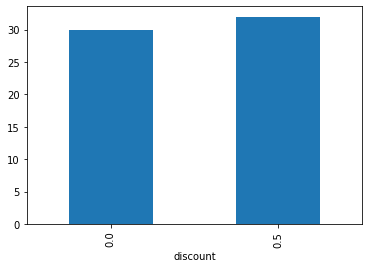

In [102]:
df.query("sub_category == 'Machines' and region == 'South' ").groupby(["discount"]).quantity.sum().plot(kind = "bar")

In [103]:
px.histogram(df.query(" discount != 0.00 and category == 'Technology' and region =='West'"), x = "segment",y = "profit", color = "sub_category" , barmode = "group")

In [104]:
df.query("sub_category == 'Machines' and region == 'West' and segment == 'Home Office' ").groupby(["discount"]).profit.sum()

discount
0.2    1045.6666
0.7   -4818.2480
Name: profit, dtype: float64

In [105]:
tech_sales_before = df.query("discount == 0.00  and category == 'Technology'").sales.sum()
tech_sales_after = df.query("discount != 0.00 and category == 'Technology'").sales.sum()
tech_sales_before < tech_sales_after

True

In [106]:
office_sales_before = df.query("discount == 0.00and category == 'Office Supplies'").sales.sum()
office_sales_after = df.query("discount != 0.00 and profit > 0 and category == 'Office Suplies'").sales.sum()
office_sales_before < office_sales_after

False

In [107]:
furn_sales_before = df.query("discount == 0.00 and category == 'Furniture'").sales.sum()
furn_sales_after = df.query("discount != 0.00 and profit > 0 and category == 'Furniture'").sales.sum()
furn_sales_before < furn_sales_after

False

In [108]:
tech_profit_before = df.query("discount == 0.00  and category == 'Technology'").profit.sum()
tech_profit_after = df.query("discount != 0.00 and category == 'Technology'").profit.sum()
tech_profit_before < tech_profit_after

False

In [109]:
df.query("discount > 0.4  and category == 'Technology'").row_id.count() / df.query("discount != 0.00  and category == 'Technology'").row_id.count() * 100

3.451676528599606

In [110]:
off_profit_before = df.query("discount == 0.00  and category == 'Office Supplies'").profit.sum()
off_profit_after = df.query("discount != 0.00 and category == 'Office Supplies'").profit.sum()
off_profit_before < off_profit_after

False

In [111]:
df.query("discount > 0.4  and category == 'Office Supplies'").row_id.count() / df.query("discount != 0.00  and category == 'Office Supplies'").row_id.count() * 100

23.47255781843286

In [112]:
furn_profit_before = df.query("discount == 0.00  and category == 'Furniture'").profit.sum()
furn_profit_after = df.query("discount != 0.00 and category == 'Furniture'").profit.sum()
furn_profit_before < furn_profit_after

False

In [113]:
df.query("discount > 0.4  and category == 'Furniture'").row_id.count() / df.query("discount != 0.00  and category == 'Furniture'").row_id.count() * 100

16.964980544747082